In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data into a pandas DataFrame

In [3]:
baseball_df = pd.read_csv('data/pitches.csv')

In [9]:
baseball_df = baseball_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [11]:
baseball_df.columns
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,7.899302,20.196724,-0.925614,3.118610,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,3.684525,20.294086,-0.000916,1.945728,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,7.670026,18.184725,-1.969467,3.548406,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,7.343168,19.395239,-1.160865,2.435223,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,5.351965,17.362413,0.046086,2.654030,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,2.049364,18.104872,0.719018,2.699417,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
706905,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,-4.902229,-20.987835,0.399907,1.736541,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
706906,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,0.660327,19.385929,0.487332,2.043276,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
706907,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,0.548382,20.448322,0.333695,3.081872,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park


In [35]:
# How many games are there? 
# Seeing when we go from a number that's not one to one (signifies the start of a game)
baseball_df['game_start'] = (baseball_df['ab'] == 1) & (baseball_df['ab'].shift(1) != 1)

# make a new game number col, using cumsum to count
baseball_df['game_number'] = baseball_df['game_start'].cumsum()

# Display the dataframe

num_games = max(baseball_df['game_number'].unique())

baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,game_start,game_number
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,-0.925614,3.118610,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,True,1
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,-0.000916,1.945728,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,-1.969467,3.548406,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,-1.160865,2.435223,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,0.046086,2.654030,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,0.719018,2.699417,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253
706905,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,0.399907,1.736541,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253
706906,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,0.487332,2.043276,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253
706907,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,0.333695,3.081872,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253


In [36]:
num_games

2253

In [ ]:
baseball_df = baseball_df['GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name']

# We need to figure out what we care about 

In [13]:
baseball_subset = baseball_df[['Date', 'Time', 'pitcher', 'ab', 'pitchnum', 'pitchname', 'pitchresult','eventtype', 'Home','Visitor']]


In [14]:
baseball_subset

,Date,Time,pitcher,ab,pitchnum,pitchname,pitchresult,eventtype,Home,Visitor
0,2021-04-01,13:20:00,"Hendricks, Kyle",1,1,FF,B,ball,Chicago Cubs,Pittsburgh Pirates
1,2021-04-01,13:20:00,"Hendricks, Kyle",1,2,FF,F,foul,Chicago Cubs,Pittsburgh Pirates
2,2021-04-01,13:20:00,"Hendricks, Kyle",1,3,FF,B,ball,Chicago Cubs,Pittsburgh Pirates
3,2021-04-01,13:20:00,"Hendricks, Kyle",1,4,FF,B,ball,Chicago Cubs,Pittsburgh Pirates
4,2021-04-01,13:20:00,"Hendricks, Kyle",1,5,FF,F,foul,Chicago Cubs,Pittsburgh Pirates
...,...,...,...,...,...,...,...,...,...,...
706904,2021-10-03,19:05:00,"Pivetta, Nick",81,4,FF,F,foul,Washington Nationals,Boston Red Sox
706905,2021-10-03,19:05:00,"Pivetta, Nick",81,5,KC,X,field_out,Washington Nationals,Boston Red Sox
706906,2021-10-03,19:05:00,"Pivetta, Nick",82,1,FF,C,called_strike,Washington Nationals,Boston Red Sox
706907,2021-10-03,19:05:00,"Pivetta, Nick",82,2,FF,F,foul,Washington Nationals,Boston Red Sox


In [15]:
baseball_subset['pitcher'].nunique() 

907

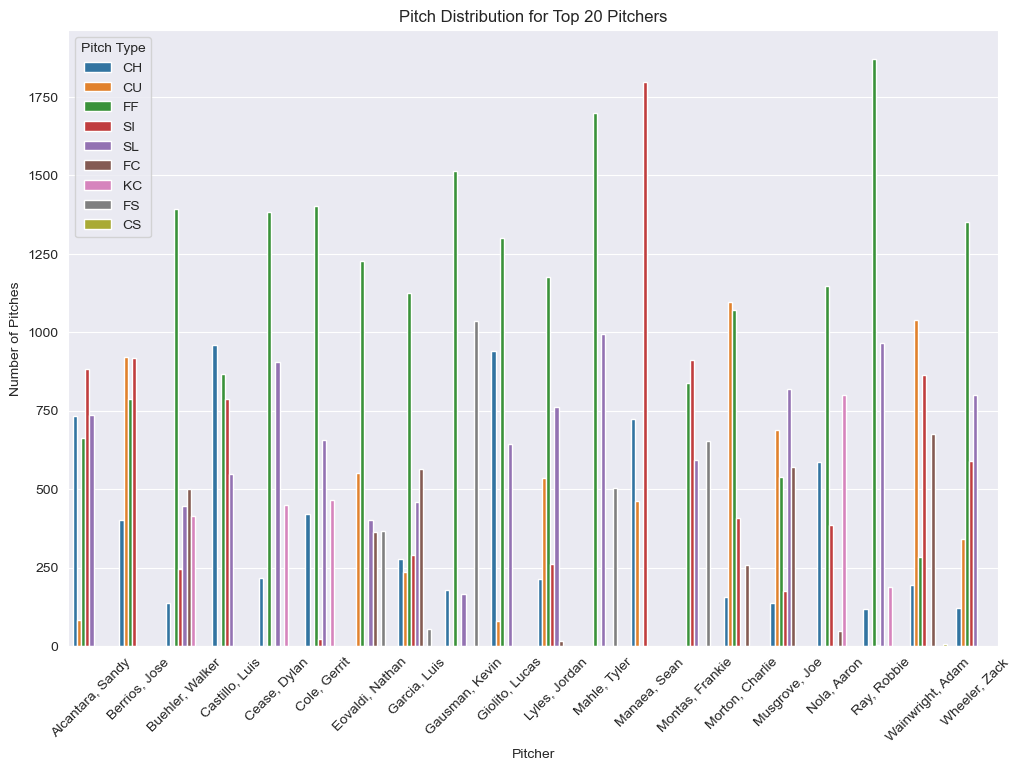

In [17]:
# Find the top 20 pitchers with the most pitches thrown
top_pitchers = baseball_subset['pitcher'].value_counts().head(20).index
filtered_df = baseball_subset[baseball_subset['pitcher'].isin(top_pitchers)]

# Group and count the filtered data
pitch_distribution = filtered_df.groupby(['pitcher', 'pitchname']).size().reset_index(name='counts')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='pitcher', y='counts', hue='pitchname', data=pitch_distribution)
plt.title('Pitch Distribution for Top 20 Pitchers')
plt.xlabel('Pitcher')
plt.ylabel('Number of Pitches')
plt.xticks(rotation=45)
plt.legend(title='Pitch Type')
plt.show()

## Show all the pitches together 

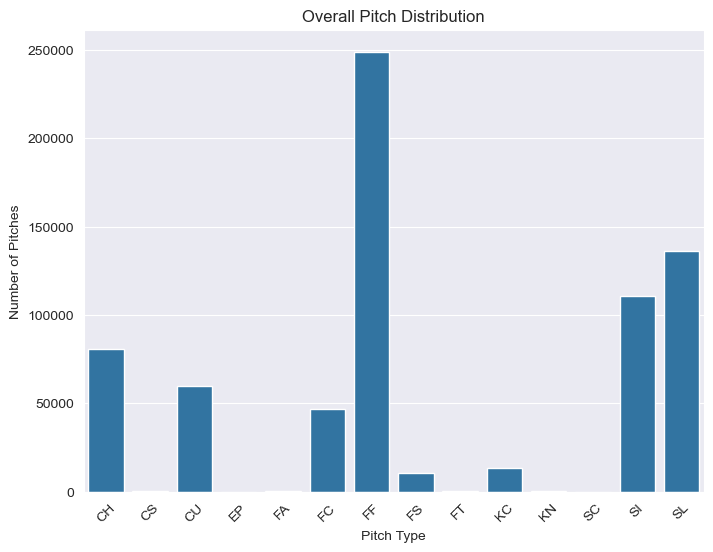

In [18]:
pitch_aggregate = baseball_subset.groupby('pitchname').size().reset_index(name='counts')

plt.figure(figsize=(8, 6))
sns.barplot(x='pitchname', y='counts', data=pitch_aggregate)
plt.title('Overall Pitch Distribution')
plt.xlabel('Pitch Type')
plt.ylabel('Number of Pitches ')
plt.xticks(rotation=45)
plt.show()


In [20]:
baseball_subset['pitchname'].value_counts()

pitchname
FF    248968
SL    136068
SI    110444
CH     80621
CU     59540
FC     46567
KC     13544
FS     10364
FA       425
CS       175
FT        90
KN        58
EP        43
SC         1
Name: count, dtype: int64

## How Many games are there?